# Проект: Принятие решений в бизнесе.

## Описание проекта


Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

**Часть 1.** Приоритизация гипотез.
В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
Задача

1.1 Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

1.2 Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

**Часть 2.** Анализ A/B-теста
Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.
Задача

Проанализируйте A/B-тест:

2.1 Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

2.2 Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

2.3 Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

2.4 Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

2.5 Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

2.6 Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

2.7 Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

2.8 Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

2.9 Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

2.10 Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.

2.11 Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

2.12 Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.

2.13 Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

2.14 Примите решение по результатам теста и объясните его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

### Загрузите данные и подготовьте их к анализу

**Описание данных**

**Данные для первой части**

Файл /datasets/hypothesis.csv. Скачать датасет

Hypothesis — краткое описание гипотезы;

Reach — охват пользователей по 10-балльной шкале;

Impact — влияние на пользователей по 10-балльной шкале;

Confidence — уверенность в гипотезе по 10-балльной шкале;

Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Данные для второй части**

*Файл /datasets/orders.csv. Скачать датасет*

transactionId — идентификатор заказа;

visitorId — идентификатор пользователя, совершившего заказ;

date — дата, когда был совершён заказ;

revenue — выручка заказа;

group — группа A/B-теста, в которую попал заказ.


*Файл /datasets/visitors.csv. Скачать датасет*

date — дата;

group — группа A/B-теста;

visitors — количество пользователей в указанную дату в указанной группе A/B-теста

Импортируем библиотеки

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import display
import scipy.stats as stats
import datetime as dt

Прочитаем файлы и сохраним их в переменные hypothesis, orders, visitors

In [2]:
try:
    hypothesis = pd.read_csv('hypothesis.csv')
except:
    hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')


In [3]:
try:
    orders = pd.read_csv('orders.csv')
except:
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')


In [4]:
try:
    visitors = pd.read_csv('visitors.csv')
except:
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')


Получим общую информацию о датафрейме hypothesis

In [5]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [6]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Проверим датафрейм  на наличие дубликатов

In [7]:
hypothesis.duplicated().sum()

0

В датафрейме hypothesis отсутствуют пропуски, типы данных совпадают, дубликаты отсутствуют.

Получим общую информацию о датафрейме orders

In [8]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Пропуски отсутствуют. Столбец date следует привести к типу datetime.

Проверим датафрейм на наличие дубликатов

In [10]:
orders.duplicated().sum()

0

Дубликаты отсутствуют. Приведем столбец date к типу datetime.

In [11]:
orders['date'] = pd.to_datetime(orders['date'])

In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


Тип данных в столбце date приведен к типу datetime. Пропуски отсутствуют. Дубликаты отсутствуют.

Получим общую информацию о датафрейме visitors

In [13]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [14]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Пропуски отсутствуют. Столбец date следует привести к типу datetime.

Проверим датафрейм на наличие дубликатов

In [15]:
visitors.duplicated().sum()

0

Дубликаты отсутствуют. Приведем столбец date к типу datetime 

In [16]:
visitors['date'] = pd.to_datetime(visitors['date'])

In [17]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Тип данных в столбце date приведен к типу datetime. Пропуски отсутствуют. Дубликаты отсутствуют.

**Вывод:** Мы изучили данные и выполнили предобработку. Определили, что в данных нет пропусков и дубликатов. Привели типы данных во всех колонках в соответствие с сохранёнными в них значениям. 

## 1.1 Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [18]:
pd.options.display.max_colwidth = 400
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


ICE (от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота») — один из самых популярных способов приоритизации задач.

Расчитывается по формуле ICE = (Impact * Confidence) / Efforts

Рассчитаем ICE

In [19]:
hypothesis['ICE'] = ((hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']).round(1)

In [20]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2


Отсортируем по убыванию приоритета.

In [21]:
hypothesis = hypothesis.sort_values(by='ICE', ascending = False)
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0


## 1.2 Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

Фреймворк RICE состоит из четырёх компонент:

Reach — скольких пользователей затронет изменение, которое вы хотите внести;

Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;

Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так; 

Efforts — сколько стоит протестировать эту гипотезу. 

Расчитывается по формуле RICE = (Reach * Impact * Confidence) / Efforts

Рассчитаем RICE

In [22]:
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']

In [23]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2,16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2,112.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0,40.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0,56.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3,4.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0,3.0


Отсортируем по убыванию приоритета.

In [24]:
hypothesis.sort_values(by='RICE', ascending = False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0,3.0


**Вывод:** при применении фреймворка ICE, пятерка лидеров выглядит так hypothesis 8, 0, 7, 6, 2(с 1-го по 5 место соответственно).

При примененеии фреймворка RICE hypothesis 8 сместился на 5 место, hypothesis 0 со 2-го на 3-е место, а hypothesis 7 с 3 места поднялась до лидера рейтинга, hypothesis 6 осталось на 4 месте, hypothesis 2 с 5-го поднялась на 2-е место.

Такие изменения обусовлены тем, что в фреймворке RICE мы учитываем такой важный парметр как reach(скольких пользователей затронет изменение т.е. охват пользователей). Поэтому гипотеза 7 у которой охват максимальный(10) стала лидером рейтинга, гипотеза 2 где охват (8) тоже поднялась на 2 место в рейтинге, а гипотеза 8 с охватом(1) (лидер рейтинга ICE) снизился до 5 места. Высокий охват не гарантирует высокое место в рейтинге гипотез(например как с гипотезой 3, где охват 8, но все остальные параметры низкие), но при прочих равных является весомым доводом, для занятия лидирующих позиций в рейтинге гипотез.

## Часть 2.

Посчитаем количество заказов и посещений в каждой из групп.

In [25]:
print ('Количество посещений в группе А -', visitors.query('group == "A"')['visitors'].sum())
print ('Количество посещений в группе B -',visitors.query('group == "B"')['visitors'].sum())
print('-----------------------------------')
print ('Количество заказов в группе А -', orders.query('group == "A"').shape[0])
print ('Количество заказов в группе B -',orders.query('group == "B"').shape[0])

Количество посещений в группе А - 18736
Количество посещений в группе B - 18916
-----------------------------------
Количество заказов в группе А - 557
Количество заказов в группе B - 640


Разница в количестве посещений в группе В и А = 180.

Разница в количестве заказов между группой В и А = 91

В переменную visitorsA внесем пользователей сделавших заказы из группы А, а в переменную visitorsВ внесем пользователей сделавших заказы из группы В.

In [26]:
visitorsA = orders[orders['group']=='A']['visitorId']
visitorsB = orders[orders['group']=='B']['visitorId']

Проверим, есть ли совпадения по id пользователей в обоих группах.

In [27]:
visitors_AB = orders.loc[orders['visitorId'].isin(visitorsA)&orders['visitorId'].isin(visitorsB),'visitorId'].unique()

In [28]:
visitors_AB

array([4069496402,  963407295,  351125977, 3234906277,  199603092,
        237748145, 3803269165, 2038680547, 2378935119, 4256040402,
       2712142231,    8300375,  276558944,  457167155, 3062433592,
       1738359350, 2458001652, 2716752286, 3891541246, 1648269707,
       3656415546, 2686716486, 2954449915, 2927087541, 2579882178,
       3957174400, 2780786433, 3984495233,  818047933, 1668030113,
       3717692402, 2044997962, 1959144690, 1294878855, 1404934699,
       2587333274, 3202540741, 1333886533, 2600415354, 3951559397,
        393266494, 3972127743, 4120364173, 4266935830, 1230306981,
       1614305549,  477780734, 1602967004, 1801183820, 4186807279,
       3766097110, 3941795274,  471551937, 1316129916,  232979603,
       2654030115, 3963646447, 2949041841])

Посчитаем количество пользователей, входящих в обе группы

In [29]:
len(visitors_AB)

58

Посчитаем общее количество уникальных пользователей в обоих группах

In [30]:
len(orders.groupby('visitorId')['group'].unique())

1031

Посчитаем долю пользователей входящих в обе группы среди всех уникальных пользователей

In [31]:
len(visitors_AB) / len(orders.groupby('visitorId')['group'].unique()) * 100

5.625606207565471

Доля пользователей входящих в обе группы составляет 5.62%, поскольку доля небольшая, уберем таких пользователей  из заказов.

In [32]:
orders = orders.loc[~orders['visitorId'].isin(visitors_AB)]

Проверим сколько пользователей осталось

In [33]:
len(orders.groupby('visitorId')['group'].unique())

973

In [34]:
print ('Количество заказов в группе А -', orders.query('group == "A"').shape[0])
print ('Количество заказов в группе B -',orders.query('group == "B"').shape[0])

Количество заказов в группе А - 468
Количество заказов в группе B - 548


Разница в количестве заказов между группами уменьшилась до 80. Данные теперь очищены от пересечений в группах и готовы к дальнейшим исследованиям.

**2.1 Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.**

Создадим массив уникальных пар значений дат и групп теста методом drop_duplicates(): 

In [35]:
datesGroups = orders[['date', 'group']].drop_duplicates()

Получим агрегированные кумулятивные по дням данные о заказах 

In [36]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date']<=x['date'], orders['group']==x['group'])].\
                                     agg({'date' : 'max', 
                                          'group' : 'max', 
                                          'transactionId' : 'nunique', 
                                          'visitorId' : 'nunique', 
                                          'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

Получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина

In [37]:
visitorsAggregated = \
datesGroups.apply(lambda x:visitors[np.logical_and(visitors['date'] <=x['date'], visitors['group'] ==x['group'])].\
                                      agg({'date': 'max',
                                           'group' : 'max',
                                           'visitors' : 'sum'}), axis=1).sort_values(by=['date', 'group'])

Объединим кумулятивные данные в одной таблице и присвоим ее столбцам понятные названия

In [38]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [39]:
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


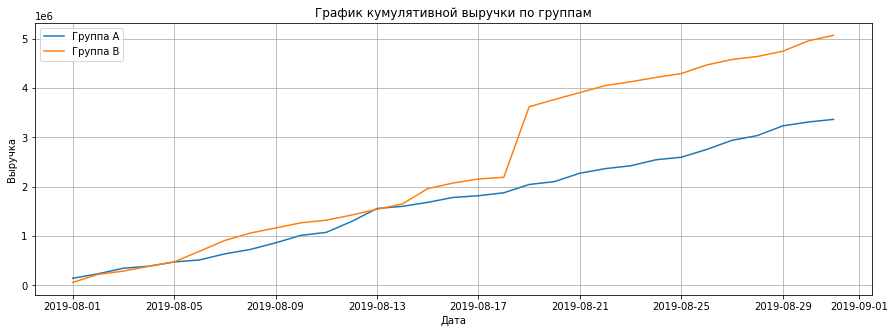

In [40]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='Группа A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='Группа B')
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.grid()
plt.legend();

Вывод: Выручка в обоих группах растет, но выручка в группе В стабильно выше чем в группе А, за исключением 13 августа, тогда выручка сравнялась с группой А.
Так же стоит отметить, что 18-19 августа выручка в группе В сильно выросла и после этого продолжился рост. Возможно этот скачек связан с крупной выручкой произошедшей в группе В в эти даты. 

**2.2 Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.**

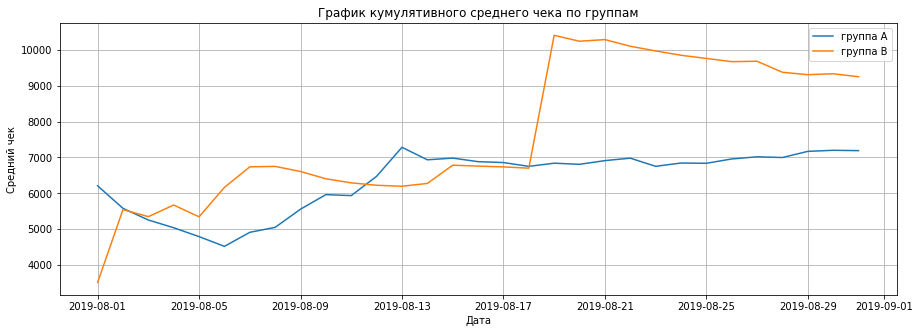

In [41]:
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='группа A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='группа B')
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.legend();

Вывод: в целом средний чек группы В выше чем у группы А, за исключением 1 августа и периода с 12-14августа. Так же отмечается сильный скачек среднего чека в группе В от 19 августа, как и на предыдущем графике. После 21 августа средний чек группы В несколько снижается, тогда как начиная с 26 августа средний чек группы А понемногу возрастает, но разрыв между группами остается значительный и группа В остается однозначным лиедером.

**2.3 Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.**

Собираем даные в одном датафрейме

In [42]:
mergedCumulativeRevenue = \
cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

Выведем получившийся датафрейм

In [43]:
mergedCumulativeRevenue.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,142779,23,59758,17
1,2019-08-02,234381,42,221801,40
2,2019-08-03,346854,66,288850,54
3,2019-08-04,388030,77,385740,68
4,2019-08-05,474413,99,475648,89


Cтроим график отношения средних чеков

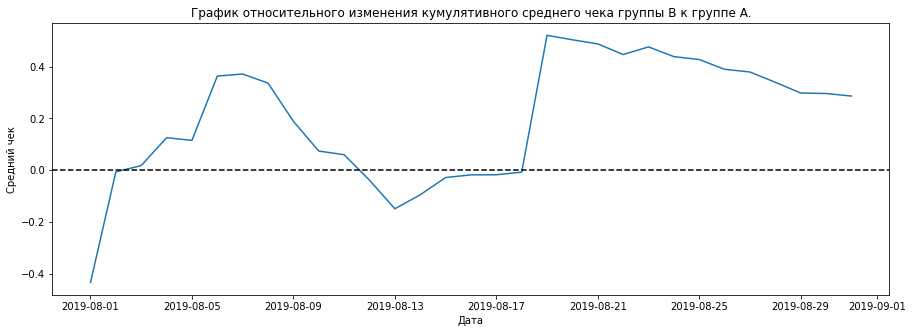

In [44]:
plt.figure(figsize=(15,5))
plt.grid
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A.')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.plot(mergedCumulativeRevenue['date'], \
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']\
                                                                                   /mergedCumulativeRevenue['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--'); 

Вывод: на графике видно, что средний чек группы В рос начиная с 1 августа, 2-го августа уже превысил показатели группы А. После 7 августа средний чек устремился вниз, и в период с 12-14 августа опустился ниже показателей группы А. Начиная с 15 августа средний чек группы В опять превысил показатели группы А, начался постепенный рост. 19 августа хорошо заметен сильный рост среднего чека в группе В (что вызвано скорее всего большим заказом, с высокой выручкой). После 21 августа средний чек группы В несколько снижается, но разрыв между группами при этом остается значительным, и группа В остается однозначным лидером.

**2.4 Построим график кумулятивного среднего количества заказов на посетителя по группам. Сделаем выводы и предположения.**

In [45]:
cumulativeOrdersAvgA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'orders', 'visitors']]
cumulativeOrdersAvgB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'orders', 'visitors']]

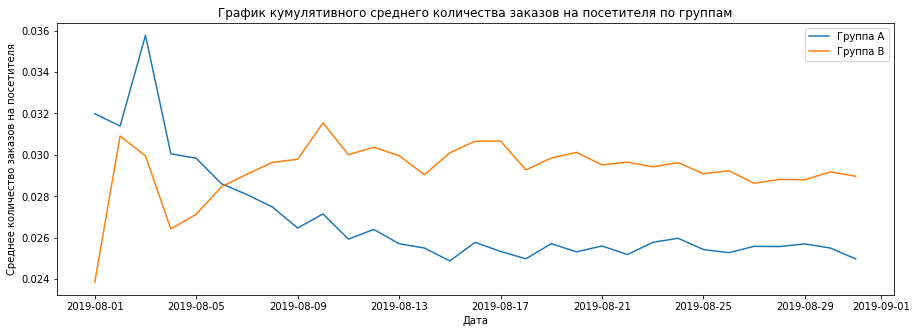

In [46]:
plt.figure(figsize=(15,5))
plt.plot(cumulativeOrdersAvgA['date'], \
        (cumulativeOrdersAvgA['orders'] / cumulativeOrdersAvgA['visitors']), label='Группа А')
plt.plot(cumulativeOrdersAvgB['date'], \
        (cumulativeOrdersAvgB['orders'] / cumulativeOrdersAvgB['visitors']), label='Группа В')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов на посетителя')
plt.legend();

**Вывод:** на графике видно, что в с 3 по 6 августа группа А опережала группу В по кумулятивному показателю среднего количества заказов на посетителя. Начиная с 6 дня группа В становится лидером, и так продолжаеся до конца августа, резкие скачки в начале графика могли быть вызваны большим количеством заказов в группе А, но как только набралось достаточно данных для отображения реального среднего группа В стала безоговорчным лидером.

**2.5 Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделаем выводы и предположения.**

Собираем даные в одном датафрейме

In [47]:
mergedCumulativeOrdersAvg = \
cumulativeOrdersAvgA.merge(cumulativeOrdersAvgB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

Выведем получившийся датафрейм

In [48]:
mergedCumulativeOrdersAvg.head()

,date,ordersA,visitorsA,ordersB,visitorsB
0,2019-08-01,23,719,17,713
1,2019-08-02,42,1338,40,1294
2,2019-08-03,66,1845,54,1803
3,2019-08-04,77,2562,68,2573
4,2019-08-05,99,3318,89,3280


Строим график относительного изменения кумулятивного среднего количества заказов на посетителя

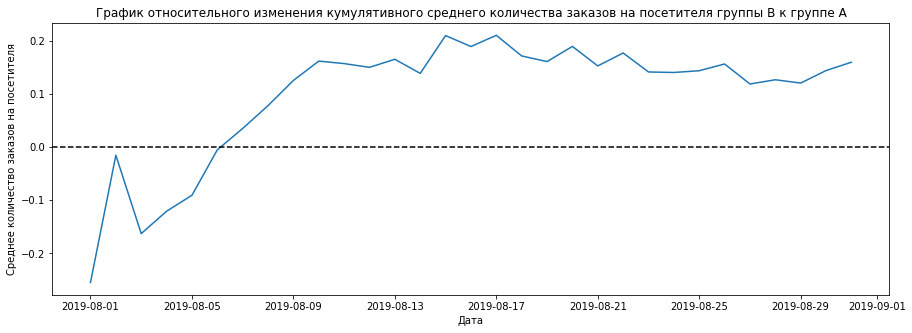

In [49]:
plt.figure(figsize=(15,5))
plt.grid
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов на посетителя')
plt.plot(mergedCumulativeOrdersAvg['date'], \
         (mergedCumulativeOrdersAvg['ordersB']/mergedCumulativeOrdersAvg['visitorsB'])/(mergedCumulativeOrdersAvg['ordersA']\
                                                                                   /mergedCumulativeOrdersAvg['visitorsA'])-1)
plt.axhline(y=0, color='black', linestyle='--'); 

**Вывод:** на графике более наглядно видно, что в с 3 по 6 августа группа А опережала группу В по кумулятивному показателю среднего количества заказов на посетителя. Начиная с 6 дня группа В становится лидером и так продолжаеся до конца августа. Показатели группы В стабильно выше группы А, тенденции к снижению разрыва между группами не наблюдается, а в последней трети эксперимента видна стабилизация результатов.

**2.6 Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.**

In [50]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False). \
                                                                        agg({'transactionId' : pd.Series.nunique})

ordersByUsers.columns = ['user_id','orders']

ordersByUsers.sort_values(by='orders',ascending=False).head(10)

,user_id,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


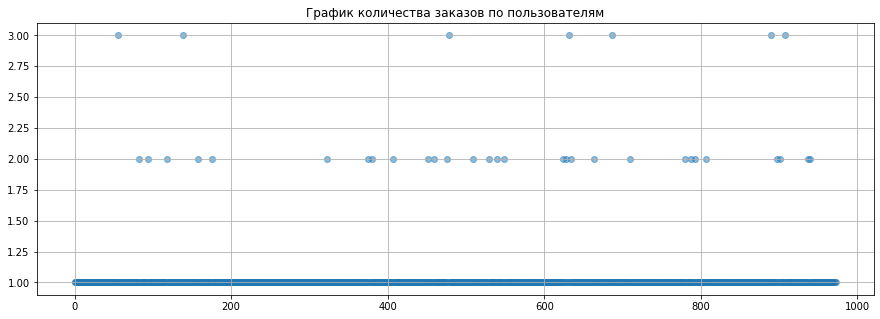

In [51]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(15,5))
plt.grid()
plt.title('График количества заказов по пользователям')
plt.scatter(x_values, ordersByUsers['orders'], alpha=0.5) ;

**Вывод:** на графике видно, что больше всего пользователей совершивших 1 заказ, значительно меньше 2 заказа, а те 3 и более можно отнести к выбросам, но для более точных выводов нужно посчитать перцентили.

**2.7 Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.**

In [52]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[1. 2.]


**Вывод:** расчитав перцентили мы выяснили, что все что выше 2 заказов на пользователя является аномалией.

**2.8 Построим точечный график стоимостей заказов. Сделаем выводы и предположения.**

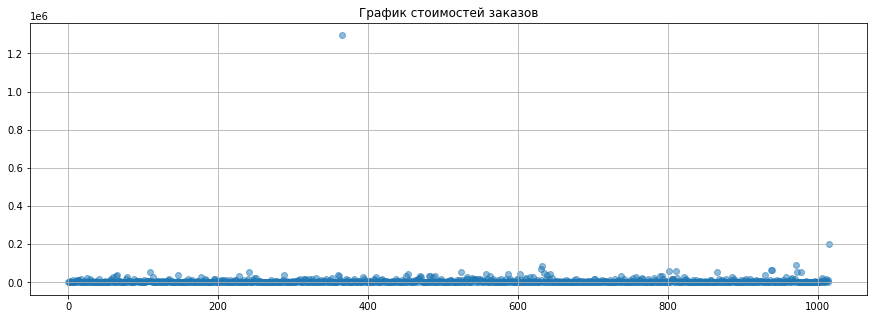

In [53]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('График стоимостей заказов')
plt.scatter(x_values, orders['revenue'], alpha=0.5);


Ограничим значения графика по поси у до 100000, чтобы лучше увидеть даипазон большинства значений.

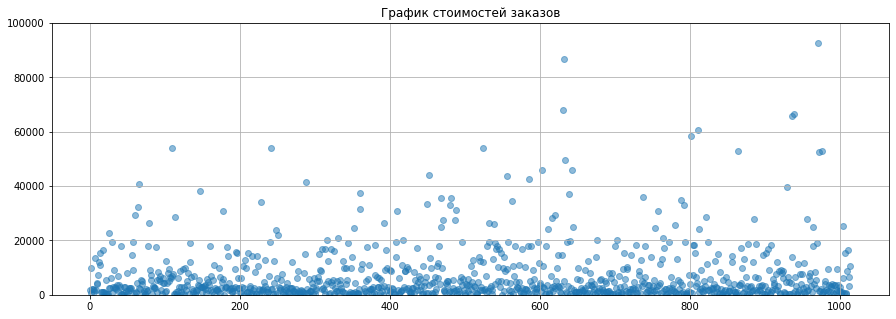

In [54]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('График стоимостей заказов')
plt.scatter(x_values, orders['revenue'], alpha=0.5)
plt.ylim(0, 100000);

**Вывод:** На графике видно, что большинство значений не превышают 100000, посчитаем перцентили для определения точной границы аномальных заказов

**2.9 Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.**

In [55]:
print(np.percentile(orders['revenue'], [95, 99])) 

[26785. 53904.]


**Вывод:** 99% заказов меньше суммы 53904, все что выше этой суммы аномалии.

**2.10 Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделаем выводы и предположения.**

In [56]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [57]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


In [58]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Посчитаем статистическую значимость различия в среднем количестве заказов между группами.

In [59]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorsId', 'orders']

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули.

In [60]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

В sampleA сохранили выборку, где каждый элемент — число заказов определённого пользователя, в том числе ноль. Значит, число элементов sampleA — это количество пользователей, сумма всех элементов — количество заказов. Чтобы получить среднее число заказов на пользователя, поделим сумму заказов на число пользователей — найдём среднее в выборке sampleA методом mean(). Аналогично найдём среднее группы B.
Выведем относительный прирост среднего числа заказов группы B: среднее число заказов группы B / среднее число заказов группы A - 1.  Округлим до трёх знаков после запятой.(alpha возьмем равное 0.05).
Нулевая гипотеза: статистически значимых различий в среднем количестве заказов на посетителя между группами А и В нет. 
Альтернативная гипотеза: различия есть.

In [61]:
print("alpha =", 0.05)

print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительный прирост среднего числа заказов группы B = {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


alpha = 0.05
p-value = 0.011
Относительный прирост среднего числа заказов группы B = 0.160


Вывод: p-value = 1.7%, что меньше alpha = 5%. Значит нулевую гипотезу, что: "статистически значимых различий в среднем количестве заказов на посетителя между группами нет" отвергаем. Это значит, что по "сырым данным" различия в группах А и В есть. А относительный прирост среднего числа заказов группы B равен 13.8%.

**2.11 Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.**

Чтобы рассчитать статистическую значимость различий в среднем чеке между группами, передадим критерию mannwhitneyu() данные о выручке с заказов (пороговое значение возьмём равное 5%). И найдём относительные различия в среднем чеке между группами.

За нулевую гипотезу возьмём что: "статистически значимых различий в средних чеках между группами нет"; тогда альтернативная гипотеза будет гласить - статистически значимые различия есть.

In [62]:
print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], \
                                                    orders[orders['group']=='B']['revenue'], \
                                                    alternative = 'two-sided')[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".\
      format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

alpha = 0.05
p-value = 0.829
Относительный показатель 'B' и 'A' = 0.287


**Вывод:** p-value больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. То есть средние чеки по "сырым" данным схожи. Так же мы можем наблюдать различие в 25.9% между группой В и А, которое не является статистически значимым т.к. это относительный показатель среднего чека группы B к группе А.

**2.12 Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделаем выводы и предположения.**

Ранее мы приняли за аномальных пользователей тех, кто совершил 2 и больше заказов или совершил заказ дороже 53904 рублей. Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 53904 — usersWithExpensiveOrders.
Объединим их в таблице abnormalUsers. Узнаем, сколько всего аномальных пользователей методом shape()

In [63]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorsId'],
    ],
    axis=0,
)
revenue_lim = 53904
usersWithExpensiveOrders = orders[orders['revenue'] > revenue_lim]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
33      249864742
58      611059232
949     887908475
744     888512513
dtype: int64
16


Аномальных пользователей 16 человек.

Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [64]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorsId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Применим статистический критерий Манна-Уитни к полученным выборкам. 
За нулевую гипотезу возьмём что: "статистически значимых различий в среднем количестве заказов на посетителя между группами теста по очищенным данным - нет "; тогда альтернативная гипотеза будет гласить - статистически значимые различия есть. (alpha = 5%)

In [65]:
print("alpha =", 0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Относительная статистическая значимость различий в среднем количестве заказов на посетителя между группами = {0:.3f}"\
      .format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

alpha = 0.05
p-value = 0.007
Относительная статистическая значимость различий в среднем количестве заказов на посетителя между группами = 0.189


Вывод: p-value = 1%, что меньше alpha = 5%. Следовательно нулевую гипотезу о том, что "статистически значимых различий в среднем количестве заказов на посетителя между группами теста по очищенным данным - нет", отвергаем. Это означает, что "очищенные" данные повторяют "сырые" и различия в группах А и В есть. Относительные же различия между группой В и А равны 17.4%(что выше чем с "сырыми" данными 13.8%, на 3.6%)

**2.13 Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.**

За нулевую гипотезу возьмём что: "статистически значимых различий в средних чеках между группами нет"; тогда альтернативная гипотеза будет гласить - статистически значимые различия есть.

In [66]:
print("alpha =", 0.05)
print(
    "p-value = {0:.3f}".format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительная статистическая значимость различий в среднем чеке заказа между группами = {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

alpha = 0.05
p-value = 0.788
Относительная статистическая значимость различий в среднем чеке заказа между группами = -0.032


Вывод: Относительный показатель среднего чека группы В на 2% ниже группы А, в то время как по "сырым" данным он был больше на 25.9%, на столько сильно влияли аномальные заказы на статистические расчеты.

Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным показала, что p-value = 79.8%, что больше alpha = 5%. Следовательно нулевую гипотезу гласящую что: "статистически значимых различий в средних чеках между группами нет" не отвергаем.(то же самое, что и с "сырыми" данными).



**2.14 Решение по результатам теста.**

Тестирование показало, что статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» и "сырым" данным есть. Лидером по относительным показателям является группа В которая превосходит на 17.4% группу А по "очищенным" данным (по "сырыми" данными на 13.8%) 

Так же тестирование выявило, что ни в "очищенных" ни в "сырых" данных статистически значимых различий в средних чеках между группами - нет. А вот относительный показатель среднего чека группы В на 2% ниже группы А, в то время как по "сырым" данным он был больше на 25.9%, такая разница это следствие влияния аномальных заказов на объективную картину данных.

В итоге принимаем решение остановить тест, зафиксировать победу группы В. Группа В значительно лучше группы А по среднему количеству заказов на посетителя, при практически одинаковых показателях средних чеков.